![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Construcción e implementación de árboles de decisión y métodos de ensamblaje

En este taller podrá poner en práctica los sus conocimientos sobre construcción e implementación de árboles de decisión y métodos de ensamblajes. El taller está constituido por 9 puntos, 5 relacionados con árboles de decisión (parte A) y 4 con métodos de ensamblaje (parte B).

## Parte A - Árboles de decisión

En esta parte del taller se usará el conjunto de datos de Capital Bikeshare de Kaggle, donde cada observación representa el alquiler de una bicicleta durante una hora y día determinado. Para más detalles puede visitar los siguientes enlaces: [datos](https://github.com/justmarkham/DAT8/blob/master/data/bikeshare.csv), [dicccionario de datos](https://www.kaggle.com/c/bike-sharing-demand/data).

### Datos prestamo de bicicletas

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación de librerías
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn import metrics
import seaborn as sns
import statsmodels.api as sm


In [3]:
# Lectura de la información de archivo .csv
bikes = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/bikeshare.csv', index_col='datetime', parse_dates=True)
# Renombrar variable "count" a "total"
bikes.rename(columns={'count':'total'}, inplace=True)
# Crear la hora como una variable 
bikes['hour'] = bikes.index.hour
# Visualización
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


### Punto 1 - Análisis descriptivo

Ejecute las celdas 1.1 y 1.2. A partir de los resultados realice un análisis descriptivo sobre las variables hour y workingday, escriba sus inferencias sobre los datos. Para complementar su análisis puede usar métricas como máximo, mínimo, percentiles entre otros.

A continuación se muestra las rentas para cada valor de la variable hour, se muestran las estadisticas básicas y algunos gráficos

In [4]:
#rentas para cada valor de la variable "hour"
agrupar_hour=bikes.groupby('hour').total
agrupar_hour.describe()


,count,mean,std,min,25%,50%,75%,max
hour,,,,,,,,
0,455.0,55.138462,43.620012,2.0,24.00,41.0,74.50,283.0
1,454.0,33.859031,34.112105,1.0,11.00,19.0,46.00,168.0
2,448.0,22.899554,26.110267,1.0,5.00,11.0,32.00,119.0
3,433.0,11.757506,12.666442,1.0,3.00,6.0,15.00,66.0
4,442.0,6.407240,4.217633,1.0,3.00,6.0,9.00,28.0
5,452.0,19.767699,12.784293,1.0,8.00,19.0,29.00,57.0
6,455.0,76.259341,54.745333,1.0,24.50,75.0,118.00,213.0
7,455.0,213.116484,159.207044,1.0,63.00,208.0,334.00,596.0
8,455.0,362.769231,231.723065,8.0,133.50,392.0,563.50,839.0


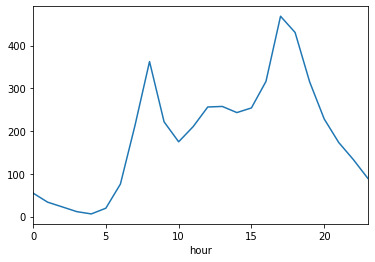

In [5]:
#rentas promedio para cada valor de la variable "hour"
bikes.groupby('hour').total.mean().plot()


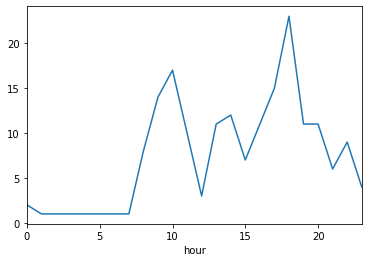

In [6]:
#rentan min para cada valor de la variable "hour"
bikes.groupby('hour').total.min().plot()

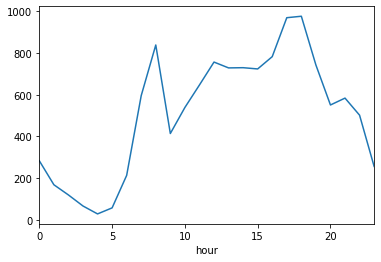

In [7]:
#rentas maximas para cada valor de la variable "hour"
bikes.groupby('hour').total.max().plot()

Si se agrupa la variable hora, se observa que las clases se encuentran balanceadas.En las horas 17 y 18 es donde ocurre el mayor número de rentas promedio siendo respectivamente 468 y 430 rentas, mientras que las horas donde ocurre el menor valor promedio de alquiler son a las 3 y 4 de la mañana. Al analizar las gráficas sobre el máximo y mínimo número de alquiler de bicicletas se observa que en las primeras horas de la mañana el número de ventas tiende a ser cero, mientras que despues de la hora 10 el valor mínimo de alquiler es 15 y el máximo 800.

In [8]:
#rentas para cada valor de la variable "workingday"
agrupar_workingday=bikes.groupby('workingday').total
agrupar_workingday.describe()

,count,mean,std,min,25%,50%,75%,max
workingday,,,,,,,,
0,3474.0,188.506621,173.724015,1.0,44.0,128.0,304.0,783.0
1,7412.0,193.011873,184.513659,1.0,41.0,151.0,277.0,977.0


Agrupando por la variable workinday, se observa que las clases se encuentran desbalanceadas a pesar de esto se observa que las estaísticas presentadas muestran valores muy similares. Cuando es un día laboral el número promedio de alquiler de bicicletas es 193, mientras que cuando no es un día laboral este valor corresponde a 188. Con respecto a la mediana para la clase 0, el 50% de las rentas son menores o iguales a 128, mientras que para la clase 1 el 50% de los alquileres de biicleras son menores o iguales a 151 durante el periodo

### Punto 2 - Análisis de gráficos

Primero ejecute la celda 2.1 y asegúrese de comprender el código y el resultado. Luego, en cada una de celdas 2.2 y 2.3 escriba un código que genere una gráfica de las rentas promedio por hora cuando la variable "workingday" es igual a 0 e igual a 1, respectivamente. Analice y escriba sus hallazgos.

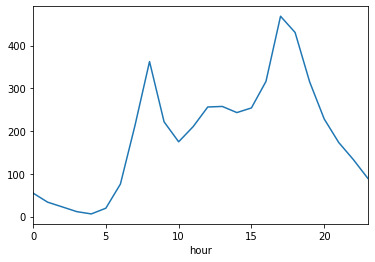

In [9]:
# Celda 2.1 - rentas promedio para cada valor de la variable "hour"
bikes.groupby('hour').total.mean().plot()

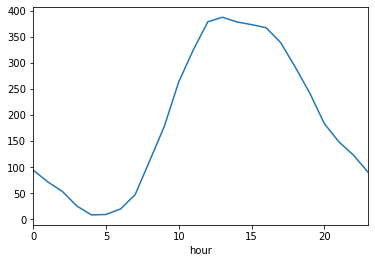

In [10]:
# Celda 2.2 - "workingday"=0 escriba su código y hallazgos 
workingday_0=bikes[bikes['workingday'] == 0]
workingday_0.groupby('hour').total.mean().plot()

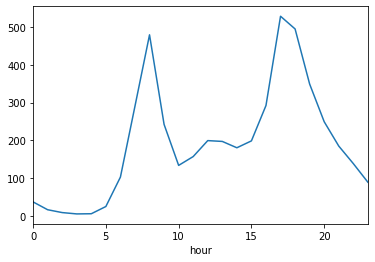

In [11]:
# Celda 2.3 - "workingday"=1 escriba su código y hallazgos 
workingday_1=bikes[bikes['workingday'] == 1]
workingday_1.groupby('hour').total.mean().plot()

Cuando se realizan las gráficas de las rentas promedio para cada valor de la variable "hour" discriminando por workingday, se observa que cuando es un día laboral en promedio hay un mayor número de alquiler alrededor de las 8 de la mañana y las 5-6 de la tarde, esto puede justificarse debido a que son las horas de ingreso y salida de la jornada laboral. Mientras que si se observa el gráfico que se refiere a dias no laborales, se observa un incremento de la renta de bicicletas a partir de las 10 de la mañana que puede asociarse a cuando las personas salen a realizar actividades de ocio como el ejercicio.

### Punto 3 - Regresión lineal
En la celda 3 ajuste un modelo de regresión lineal a todo el conjunto de datos, utilizando "total" como variable de respuesta y "hour" y "workingday" como las únicas variables predictoras. Luego, imprima los coeficientes e interprételos. ¿Cuáles son las limitaciones de la regresión lineal en este caso?

In [12]:
# Celda 3
Respuesta=bikes['total']
Predictoras=bikes.loc[:,['hour','workingday']]

regresion_lineal = LinearRegression()
rl=regresion_lineal.fit(Predictoras,Respuesta)

# Veamos los coeficieNtes obtenidos:
print('Coeficiente: \n', rl.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Intercepto: \n', rl.intercept_)


Coeficiente: 
 [10.49206282  4.07248627]
Intercepto: 
 67.70595026191602


Interpretación de los coeficientes:

*Hour: El coeficiente para la hora es 10.49 El coeficiente indica que por cada unidad adicional en la hora se puede esperar que el alquiler de bicicletas aumente un promedio de 10.49.

*workingday: El coeficiente es 4.07, al ser una variable cualitativa su interpretación es diferente. Si se compara el alquiler de bicicletas en un dia laboral o no, ambos en la misma hora, se espera que el promedio de renta de bicicletas en un dia laboral sea 4.07 mayor que en un día no laboral

Las limitaciones del modelo de regresión lineal son las siguientes:
*Se da por hecho que la relacion de los predictores con  la variable de respuesta es lineal
*Este tipo de modelos debe cumplir una serie de supuestos 
*Se ve afectado por datos atipicos

Por lo anterior este modelo no es el más optimo si se compara con arboles de regresión o ensamblaje, y por lo tanto su desempeño puede ser deficiente,

### Punto 4 - Árbol de decisión manual
En la celda 4 cree un árbol de decisiones para pronosticar la variable "total" iterando **manualmente** sobre las variables "hour" y  "workingday". El árbol debe tener al menos 6 nodos finales.

In [13]:
## Division de los datos en conjunto de prueba y de entrenamiento
XTrain, XTest, yTrain, yTest = train_test_split(Predictoras, Respuesta, test_size=0.33, random_state=0)

### Punto 5 - Árbol de decisión con librería
En la celda 5 entrene un árbol de decisiones con la **librería sklearn**, usando las variables predictoras "hour" y "workingday" y calibre los parámetros que considere conveniente para obtener un mejor desempeño. Comente el desempeño del modelo con alguna métrica de desempeño de modelos de regresión y compare desempeño con el modelo del punto 3.

In [14]:
# Celda 6
## Arbol de decision: Calibracion

# Lista de valores para calibrar el criterio de parada de máxima profundidad (max_depth)
max_depth_range = range(1, 50)

# Lista para guardar los valores de máxima profundidad (max_depth)
mean_squared_error = []

# Loop para obtener el desempeño del modelo de acuerdo con la máxima profundidad
for depth in max_depth_range:
    # Definición del árbol de decisión usando DecisionTreeClassifier de la libreria sklearn
    clf = DecisionTreeRegressor(max_depth=depth, random_state=1)
    mean_squared_error.append(cross_val_score(clf, XTrain, yTrain, cv=10, scoring='neg_mean_squared_error').mean())


In [15]:
sorted(zip(mean_squared_error, max_depth_range))[::-1][0]

(-11469.028942365456, 8)

In [16]:
clf = DecisionTreeRegressor(max_depth=8, random_state=1)
clf.fit(XTrain, yTrain)

DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=1, splitter='best')

In [17]:
prediccionTree=clf.predict(XTest)
##Calculo del MSE
MSE=np.average(np.square(prediccionTree-yTest))
print('MSE del arbol de regresion en la muestra de test es:')
print(MSE)

MSE del arbol de regresion en la muestra de test es:
11421.13577122465


## Parte B - Métodos de ensamblajes
En esta parte del taller se usará el conjunto de datos de Popularidad de Noticias Online. El objetivo es predecir si la notica es popular o no, la populridad esta dada por la cantidad de reacciones en redes sociales. Para más detalles puede visitar el sigueinte enlace: [datos](https://archive.ics.uci.edu/ml/datasets/online+news+popularity).

### Datos popularidad de noticias

In [18]:
# Lectura de la información de archivo .csv
df = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/mashable.csv', index_col=0)
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Popular
0,http://mashable.com/2014/12/10/cia-torture-rep...,28.0,9.0,188.0,0.732620,1.0,0.844262,5.0,1.0,1.0,...,0.200000,0.80,-0.487500,-0.60,-0.250000,0.9,0.8,0.4,0.8,1
1,http://mashable.com/2013/10/18/bitlock-kicksta...,447.0,7.0,297.0,0.653199,1.0,0.815789,9.0,4.0,1.0,...,0.160000,0.50,-0.135340,-0.40,-0.050000,0.1,-0.1,0.4,0.1,0
2,http://mashable.com/2013/07/24/google-glass-po...,533.0,11.0,181.0,0.660377,1.0,0.775701,4.0,3.0,1.0,...,0.136364,1.00,0.000000,0.00,0.000000,0.3,1.0,0.2,1.0,0
3,http://mashable.com/2013/11/21/these-are-the-m...,413.0,12.0,781.0,0.497409,1.0,0.677350,10.0,3.0,1.0,...,0.100000,1.00,-0.195701,-0.40,-0.071429,0.0,0.0,0.5,0.0,0
4,http://mashable.com/2014/02/11/parking-ticket-...,331.0,8.0,177.0,0.685714,1.0,0.830357,3.0,2.0,1.0,...,0.100000,0.55,-0.175000,-0.25,-0.100000,0.0,0.0,0.5,0.0,0


In [19]:
# Definición variable de interes y variables predictoras
X = df.drop(['url', 'Popular'], axis=1)
y = df['Popular']
y.mean()

0.5

In [20]:
X

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,28.0,9.0,188.0,0.732620,1.0,0.844262,5.0,1.0,1.0,2.0,...,0.470000,0.200000,0.80,-0.487500,-0.60,-0.250000,0.9,0.8,0.4,0.8
1,447.0,7.0,297.0,0.653199,1.0,0.815789,9.0,4.0,1.0,0.0,...,0.342778,0.160000,0.50,-0.135340,-0.40,-0.050000,0.1,-0.1,0.4,0.1
2,533.0,11.0,181.0,0.660377,1.0,0.775701,4.0,3.0,1.0,0.0,...,0.516263,0.136364,1.00,0.000000,0.00,0.000000,0.3,1.0,0.2,1.0
3,413.0,12.0,781.0,0.497409,1.0,0.677350,10.0,3.0,1.0,0.0,...,0.436654,0.100000,1.00,-0.195701,-0.40,-0.071429,0.0,0.0,0.5,0.0
4,331.0,8.0,177.0,0.685714,1.0,0.830357,3.0,2.0,1.0,0.0,...,0.346429,0.100000,0.55,-0.175000,-0.25,-0.100000,0.0,0.0,0.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,523.0,10.0,660.0,0.493884,1.0,0.633971,20.0,4.0,1.0,0.0,...,0.311531,0.050000,0.50,-0.258730,-0.80,-0.100000,0.1,0.0,0.4,0.0
5996,139.0,9.0,144.0,0.647887,1.0,0.739583,15.0,4.0,10.0,1.0,...,0.287273,0.100000,0.60,-0.250000,-0.30,-0.200000,0.0,0.0,0.5,0.0
5997,623.0,8.0,536.0,0.512287,1.0,0.647929,6.0,2.0,1.0,1.0,...,0.304167,0.100000,0.40,-0.156250,-0.30,-0.100000,0.0,0.0,0.5,0.0
5998,584.0,10.0,266.0,0.534413,1.0,0.605882,9.0,6.0,1.0,0.0,...,0.304924,0.100000,0.60,-0.250000,-0.40,-0.100000,0.0,0.0,0.5,0.0


In [21]:
# División de la muestra en set de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Punto 6 - Árbol de decisión y regresión logística
En la celda 6 construya un árbol de decisión y una regresión logística. Para el árbol calibre al menos un parámetro y evalúe el desempeño de cada modelo usando las métricas de Accuracy y F1-Score.

La calibración del parámetro para el árbol de decisión se realiza sobre la máxima profundidad y se calcula el max_depth según el accuracy

In [22]:
# Celda 6
## Arbol de decision: Calibracion

# Lista de valores para calibrar el criterio de parada de máxima profundidad (max_depth)
max_depth_range = range(1, 20)

# Lista para guardar los valores de máxima profundidad (max_depth)
accuracy_scores = []

# Loop para obtener el desempeño del modelo de acuerdo con la máxima profundidad
for depth in max_depth_range:
    # Definición del árbol de decisión usando DecisionTreeClassifier de la libreria sklearn
    clf = DecisionTreeClassifier(max_depth=depth, random_state=1)
    accuracy_scores.append(cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy').mean())

Text(0, 0.5, 'Accuracy')

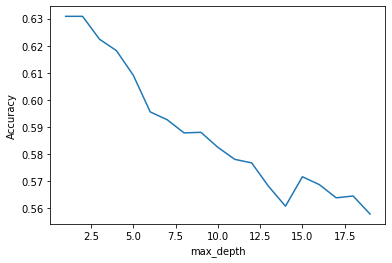

In [23]:
plt.plot(max_depth_range, accuracy_scores)
plt.xlabel('max_depth')
plt.ylabel('Accuracy')

In [24]:
# Mejor accuracy (desempeño del modelo) y su correspondiente max_depth
sorted(zip(accuracy_scores, max_depth_range))[::-1][0]

(0.6308795368536799, 2)

Como el mejor max_depth fue igual a 2 con un accuracy de 63% se ajusta un arbol usando este valor

In [25]:
clf = DecisionTreeClassifier(max_depth=2, random_state=1)
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

In [26]:
prediccionesTree=clf.predict(X_test)


## Accuracy

accuracyTree=accuracy_score(y_true=y_test, y_pred=prediccionesTree)
print('La exactitud en la muestra de test es:' +str(accuracyTree))

## F1 Score

F1TREE=f1_score(y_test, prediccionesTree, average=None)
print('El F1 score en la muestra de test es:'+str(F1TREE[0]))

La exactitud en la muestra de test es:0.6453333333333333
El F1 score en la muestra de test es:0.6458055925432755


In [27]:
### Regresion logistica

clfRegLog= LogisticRegression()
clfRegLog.fit(X_train, y_train)

prediccionesRegLog=clfRegLog.predict(X_test)


## Accuracy

accuracyRegLog=accuracy_score(y_true=y_test, y_pred=prediccionesRegLog)
print('La exactitud en la muestra de test es:' +str(accuracyRegLog))

## F1 Score

F1RegLog=f1_score(y_test, prediccionesRegLog, average=None)
print('El F1 score en la muestra de test es:'+str(F1RegLog[0]))

La exactitud en la muestra de test es:0.6273333333333333
El F1 score en la muestra de test es:0.642811501597444


### Punto 7 - Votación Mayoritaria
En la celda 7 elabore un esamble con la metodología de **Votación mayoritaria** compuesto por 300 muestras bagged para cada uno de los siguientes escenarios:

-100 árboles de decisión donde max_depth = None\
-100 árboles de decisión donde max_depth = 2\
-100 regresiones logísticas

Evalúe los modelos utilizando las métricas de Accuracy y F1-Score.

In [28]:
# Escenario 1: 100 árboles de decisión donde max_depth = None

clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth = None), n_estimators=100, bootstrap=True,
                        random_state=42, n_jobs=-1, oob_score=True, max_samples=300)

# Predicción y desempeño al hacer votación mayoritaria
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
clff1=metrics.f1_score(y_test,y_pred)
clfaccuracy=metrics.accuracy_score(y_test,y_pred)
print("Para el escenario 1 el F1-score es: "+str(clff1))
print("Para el escenario 1 e accuracy es: "+str(clfaccuracy))

Para el escenario 1 el F1-score es: 0.6675585284280936
Para el escenario 1 e accuracy es: 0.6686666666666666


En el primer escenario con árboles de decisión donde max_depth = None, se presenta un F1-Score del 66.7% y un accuracy del 66.8% que mejora si se compara con el modelo anterior del literal 6

In [29]:
# Escenario 2: 100 árboles de decisión donde max_depth = 2

clf2 = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth = 2), n_estimators=100, bootstrap=True,
                        random_state=42, n_jobs=-1, oob_score=True, max_samples=300)

# Predicción y desempeño al hacer votación mayoritaria
clf2.fit(X_train, y_train)
y_pred = clf2.predict(X_test)

clf2f1=metrics.f1_score(y_test,y_pred)
clf2accuracy=metrics.accuracy_score(y_test,y_pred)
print("Para el escenario 2 el F1-score es: "+str(clf2f1))
print("Para el escenario 2 e accuracy es: "+str(clf2accuracy))

Para el escenario 2 el F1-score es: 0.6335403726708074
Para el escenario 2 e accuracy es: 0.646


En el segundo escenario con árboles de decisión donde max_depth = 2, se presenta un F1-Score del 63.3% y un accuracy del 64.6%, estas metricas son muy similares a los resultados del modelo anterior del literal 6

In [30]:
# Escenario 3: 100 regresiones logísticas

clf3 = BaggingClassifier(base_estimator=LogisticRegression(), n_estimators=100, bootstrap=True,
                        random_state=42, n_jobs=-1, oob_score=True, max_samples=300)

# Predicción y desempeño al hacer votación mayoritaria
clf3.fit(X_train, y_train)
y_pred = clf3.predict(X_test)
clf3f1=metrics.f1_score(y_test,y_pred)
clf3accuracy=metrics.accuracy_score(y_test,y_pred)
print("Para el escenario 3 el F1-score es: "+str(clf3f1))
print("Para el escenario 3 e accuracy es: "+str(clf3accuracy))

Para el escenario 3 el F1-score es: 0.6173010380622839
Para el escenario 3 e accuracy es: 0.6313333333333333


En el tercer escenario con regresión logistica, se presenta un F1-Score del 61.7% y un accuracy del 63.1%, estas metricas son inferiores a los resultados del modelo anterior del literal 6

### Punto 8 - Votación Ponderada
En la celda 8 elabore un ensamble con la metodología de **Votación ponderada** compuesto por 300 muestras bagged para los mismos tres escenarios del punto 7. Evalúe los modelos utilizando las métricas de Accuracy y F1-Score

In [31]:
## Escenario 1
# Obtención de los pesos alpha de cada modelo de acuerdo al error OOB
errors = np.zeros(clf.n_estimators)
y_pred_all_ = np.zeros((X_test.shape[0], clf.n_estimators))

for i in range(clf.n_estimators):
    oob_sample = ~clf.estimators_samples_[i]
    y_pred_ = clf.estimators_[i].predict(X_train.values[oob_sample])
    errors[i] = metrics.accuracy_score(y_pred_, y_train.values[oob_sample])
    y_pred_all_[:, i] = clf.estimators_[i].predict(X_test)
    
alpha = (1 - errors) / (1 - errors).sum()
y_pred = (np.sum(y_pred_all_ * alpha, axis=1) >= 0.5).astype(np.int)

# Desempeño al hacer votación ponderada
clff1_=metrics.f1_score(y_test,y_pred)
clfaccuracy_=metrics.accuracy_score(y_test,y_pred)
print("Para el escenario 1 el F1-score es: "+str(clff1_))
print("Para el escenario 1 el accuracy es: "+str(clfaccuracy_))

Para el escenario 1 el F1-score es: 0.6715328467153284
Para el escenario 1 el accuracy es: 0.67


En el primer escenario con árboles de decisión donde max_depth = None, se presenta un F1-Score del 67.1% y un accuracy del 67% que mejora si se compara con el modelo tanto del literal 6 como 7

In [32]:
## Escenario 2
# Obtención de los pesos alpha de cada modelo de acuerdo al error OOB
errors = np.zeros(clf2.n_estimators)
y_pred_all_ = np.zeros((X_test.shape[0], clf2.n_estimators))

for i in range(clf2.n_estimators):
    oob_sample = ~clf2.estimators_samples_[i]
    y_pred_ = clf2.estimators_[i].predict(X_train.values[oob_sample])
    errors[i] = metrics.accuracy_score(y_pred_, y_train.values[oob_sample])
    y_pred_all_[:, i] = clf2.estimators_[i].predict(X_test)
    
alpha = (1 - errors) / (1 - errors).sum()
y_pred = (np.sum(y_pred_all_ * alpha, axis=1) >= 0.5).astype(np.int)

# Desempeño al hacer votación ponderada
clf2f1_=metrics.f1_score(y_pred, y_test)
clf2accuracy_=metrics.accuracy_score(y_pred, y_test)
print("Para el escenario 2 el F1-score es: "+str(clf2f1_))
print("Para el escenario 2 el accuracy es: "+str(clf2accuracy_))

Para el escenario 2 el F1-score es: 0.6347222222222222
Para el escenario 2 el accuracy es: 0.6493333333333333


En el segundo escenario con árboles de decisión donde max_depth = 2, se presenta un F1-Score del 63.5% y un accuracy del 64.9%, estas metricas son muy similares a los resultados del literal 6 y 7

In [33]:
## Escenario 3
# Obtención de los pesos alpha de cada modelo de acuerdo al error OOB
errors = np.zeros(clf3.n_estimators)
y_pred_all_ = np.zeros((X_test.shape[0], clf3.n_estimators))

for i in range(clf3.n_estimators):
    oob_sample = ~clf3.estimators_samples_[i]
    y_pred_ = clf3.estimators_[i].predict(X_train.values[oob_sample])
    errors[i] = metrics.accuracy_score(y_pred_, y_train.values[oob_sample])
    y_pred_all_[:, i] = clf3.estimators_[i].predict(X_test)
    
alpha = (1 - errors) / (1 - errors).sum()
y_pred = (np.sum(y_pred_all_ * alpha, axis=1) >= 0.5).astype(np.int)

# Desempeño al hacer votación ponderada
clf3f1_=metrics.f1_score(y_test,y_pred)
clf3accuracy_=metrics.accuracy_score(y_test,y_pred)
print("Para el escenario 3 el F1-score es: "+str(clf3f1_))
print("Para el escenario 3 e accuracy es: "+str(clf3accuracy_))

Para el escenario 3 el F1-score es: 0.61731843575419
Para el escenario 3 e accuracy es: 0.6346666666666667


En el tercer escenario con regresión logística, se presenta un F1-Score del 61.7% y un accuracy del 63.5%, estas metricas son muy similares a los resultados del literal 6 y 7

### Punto 9 - Comparación y análisis de resultados
En la celda 9 comente sobre los resultados obtenidos con las metodologías usadas en los puntos 7 y 8, compare los resultados y enuncie posibles ventajas o desventajas de cada una de ellas.

[Text(0.5, 1.0, 'Valor métrica F1-Score para ambas metodologías')]

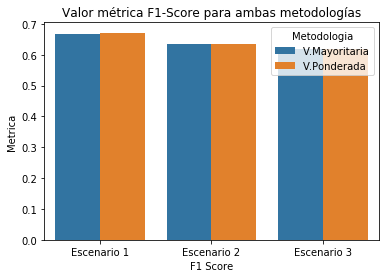

In [34]:
## F1 Score
X1=["Escenario 1","Escenario 1","Escenario 2","Escenario 2","Escenario 3","Escenario 3"]
Y1=[clff1,clff1_,clf2f1,clf2f1_,clf3f1,clf3f1_]
MODELO=["V.Mayoritaria","V.Ponderada","V.Mayoritaria","V.Ponderada","V.Mayoritaria","V.Ponderada"]

df = pd.DataFrame()

df['F1 Score'] = X1
df['Metrica'] = Y1
df['Metodologia'] = MODELO

sns.barplot(x = 'F1 Score', y = 'Metrica', hue = 'Metodologia', data = df).set(title='Valor métrica F1-Score para ambas metodologías')


[Text(0.5, 1.0, 'Valor métrica Accuracy para ambas metodologías')]

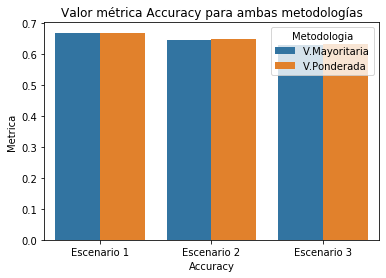

In [35]:
## 
X2=["Escenario 1","Escenario 1","Escenario 2","Escenario 2","Escenario 3","Escenario 3"]
Y2=[clfaccuracy,clfaccuracy_,clf2accuracy,clf2accuracy_,clf3accuracy,clf3accuracy_]
MODELO2=["V.Mayoritaria","V.Ponderada","V.Mayoritaria","V.Ponderada","V.Mayoritaria","V.Ponderada"]

df = pd.DataFrame()

df['Accuracy'] = X2
df['Metrica'] = Y2
df['Metodologia'] = MODELO

sns.barplot(x = 'Accuracy', y = 'Metrica', hue = 'Metodologia', data = df).set(title='Valor métrica Accuracy para ambas metodologías')


En los resultados obtenidos se observa que en general el escenario 1 que corresponde a un ensamble con árboles de decisión donde max_depth = None presenta valores más altos en ambas métricas (F1 Score y accuracy) y con ambas metodologías, aunque hay una leve mejoría usando valor ponderado. Sin embargo, el escenario 3 que corresponde a un ensamble con regresión logística presenta las métricas más bajas en ambas metodologías.

Podemos concluir que con respecto a los ensambles usando árboles de decisión el mejor escenario es el 1 debido a que no hay restricción con respecto a la profundidad del árbol como si la hay en el escenario 2 donde la profundidad es igual a 2, pero al comparar los resultados con el de regresión logistica da mucho mejor y esto es debido a que los arboles son modelos robustos frente a datos atípicos y valores nulos.

Los resultados de las métricas se encuentran entre el 60-70% y una manera de mejorar el desempeño es calibrar los parámetros.